## Data prep and load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PowerTransformer
import seaborn as sns
from datetime import datetime, timedelta
from scipy.stats import pearsonr  
import os
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

# Load the datasets
inventory = pd.read_csv('../../Data/Processed/Inventory.csv')
opening_stock = pd.read_csv('../../Data/Processed/OpeningStock.csv')
purchases = pd.read_csv('../../Data/Processed/Purchases.csv')
sales = pd.read_csv('../../Data/Processed/Sales.csv')
stores = pd.read_csv('../../Data/Processed/Stores.csv')


# Convert date columns to datetime
opening_stock['startDate'] = pd.to_datetime(opening_stock['startDate'])
purchases['PODate'] = pd.to_datetime(purchases['PODate'])
purchases['ReceivingDate'] = pd.to_datetime(purchases['ReceivingDate'])
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])

 



## EDA analysis

### Missing value analysis

In [2]:
print('Info of "inventory" dataframe')
inventory.info()
print()

print('Info of "opening_stock" dataframe')
opening_stock.info()
print()

print('Info of "purchases" dataframe')
purchases.info()
print()

print('Info of "sales" dataframe')
sales.info()
print()

print('Info of "stores" dataframe')
stores.info()
print()


Info of "inventory" dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11613 entries, 0 to 11612
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ItemID       11613 non-null  int64 
 1   Description  11613 non-null  object
dtypes: int64(1), object(1)
memory usage: 181.6+ KB

Info of "opening_stock" dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5944 entries, 0 to 5943
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   StoreID    5944 non-null   int64         
 1   onHand     5944 non-null   int64         
 2   startDate  5944 non-null   datetime64[ns]
 3   ItemID     5944 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 185.9 KB

Info of "purchases" dataframe
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70426 entries, 0 to 70425
Data columns (total 5 columns):
 #   Column         Non-N

### Check for duplicates
We only check for duplicate products as that is the only field that should not contain any duplicates. It is possible that the same purchase or sale could take place on the same day so we do not check for any duplicates.

In [3]:
duplicates = inventory[inventory.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [ItemID, Description]
Index: []


### Check for outliers

In [4]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize  
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

# Load the datasets
leadTime = pd.read_csv('../../Data/Prepped/lead_time_data.csv')
salesForecast = pd.read_csv('../../Data/Prepped/sales_forecast_data.csv')

In [5]:
purchases.describe().T

,count,mean,min,25%,50%,75%,max,std
StoreID,70426.00,1.40,1.00,1.00,1.00,2.00,2.00,0.49
PODate,70426,2016-06-30 16:42:12.564677888,2015-12-20 00:00:00,2016-04-03 00:00:00,2016-07-03 00:00:00,2016-10-02 00:00:00,2016-12-23 00:00:00,NaN
ReceivingDate,70426,2016-07-08 16:12:21.408002816,2016-01-01 00:00:00,2016-04-11 00:00:00,2016-07-11 00:00:00,2016-10-10 00:00:00,2016-12-31 00:00:00,NaN
Quantity,70426.00,14.34,1.00,6.00,11.00,12.00,407.00,21.39
ItemID,70426.00,12386.16,58.00,3612.00,6429.00,18743.00,90631.00,12624.44


Text(0.5, 1.0, 'Box Plot: Raw Features')

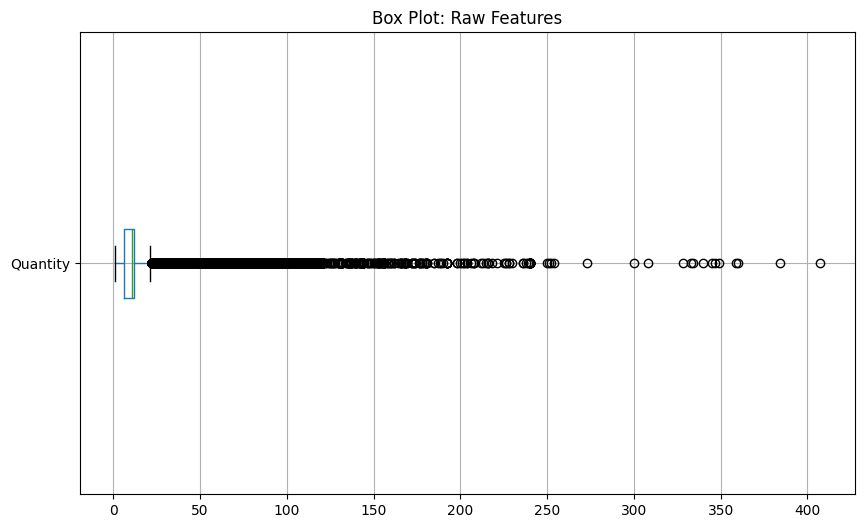

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = purchases[['Quantity']].boxplot(vert=False, ax=ax)
ax.set_title('Box Plot: Raw Features')

Missing values in SalesQuantity: 0


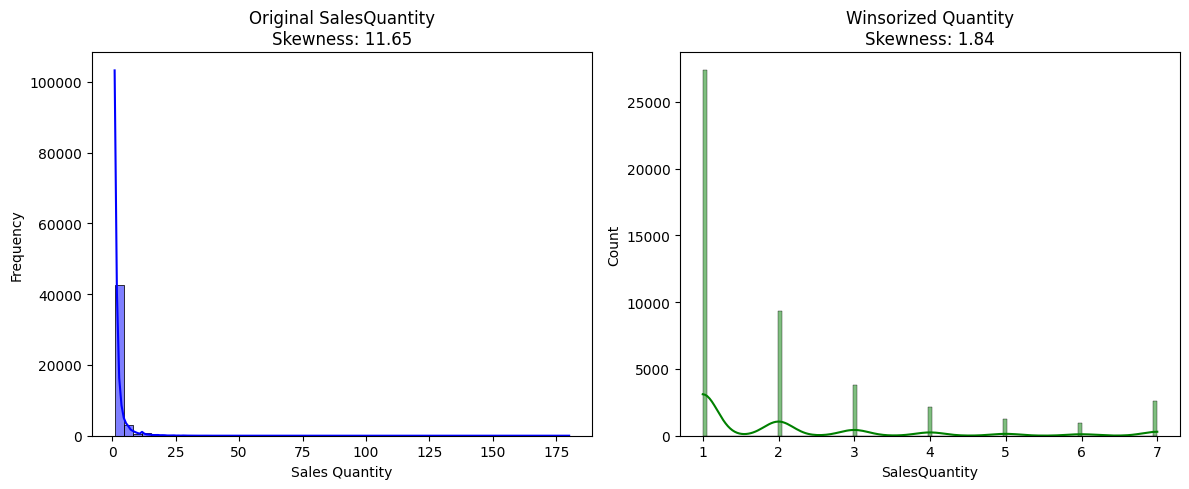


Original SalesQuantity Statistics:
count   47477.00
mean        2.32
std         3.30
min         1.00
25%         1.00
50%         1.00
75%         2.00
max       180.00
Name: SalesQuantity, dtype: float64

Winsorized SalesQuantity Statistics:
count   47477.00
mean        2.03
std         1.67
min         1.00
25%         1.00
50%         1.00
75%         2.00
max         7.00
Name: SalesQuantity, dtype: float64

Winsorized DataFrame saved to '../../Data/Final/sales_forecast_data.csv'


In [7]:
import pandas as pd
import numpy as np
from scipy.stats.mstats import winsorize  
import matplotlib.pyplot as plt
import seaborn as sns

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

# Load the datasets
prep_file_path = '../../Data/Prepped/sales_forecast_data.csv'
final_file_path = '../../Data/Final/sales_forecast_data.csv'

# Create a copy for winsorization to ensure original data remains untouched
winsorized_forecast = salesForecast.copy()

# Check for missing values in SalesQuantity
print("Missing values in SalesQuantity:", salesForecast['SalesQuantity'].isnull().sum())

# Apply winsorization to 'SalesQuantity' at the 5th and 95th percentiles
winsorized_forecast['SalesQuantity'] = winsorize(winsorized_forecast['SalesQuantity'], limits=(0.05, 0.05))

# Visualize the original and winsorized data
plt.figure(figsize=(12, 5))

# Histogram of original data
plt.subplot(1, 2, 1)
sns.histplot(data=salesForecast, x="SalesQuantity", bins=50, kde=True, color='blue')
plt.title(f"Original SalesQuantity\nSkewness: {salesForecast['SalesQuantity'].skew():.2f}")
plt.xlabel("Sales Quantity")
plt.ylabel("Frequency")
# Histogram of winsorized data
plt.subplot(1, 2, 2)
sns.histplot(winsorized_forecast['SalesQuantity'], kde=True, color='green')
plt.title(f"Winsorized Quantity\nSkewness: {winsorized_forecast['SalesQuantity'].skew():.2f}")
plt.tight_layout()
plt.show()

# Compare summary statistics
print("\nOriginal SalesQuantity Statistics:")
print(salesForecast['SalesQuantity'].describe())
print("\nWinsorized SalesQuantity Statistics:")
print(winsorized_forecast['SalesQuantity'].describe())

# Save the winsorized DataFrame to the Final folder with the same name as the original
winsorized_forecast.to_csv(final_file_path, index=False)
print(f"\nWinsorized DataFrame saved to '{final_file_path}'")

In [8]:
sales.describe().T

,count,mean,min,25%,50%,75%,max,std
StoreID,47138.00,1.26,1.00,1.00,1.00,2.00,2.00,0.44
SalesQuantity,47138.00,2.32,1.00,1.00,1.00,2.00,180.00,3.30
SalesDate,47138,2016-01-27 12:06:04.750307840,2016-01-01 00:00:00,2016-01-14 00:00:00,2016-01-26 00:00:00,2016-02-10 00:00:00,2016-02-29 00:00:00,NaN
ItemID,47138.00,12481.78,58.00,3696.00,6542.00,18592.00,47090.00,12552.47


Text(0.5, 1.0, 'Box Plot: Raw Features')

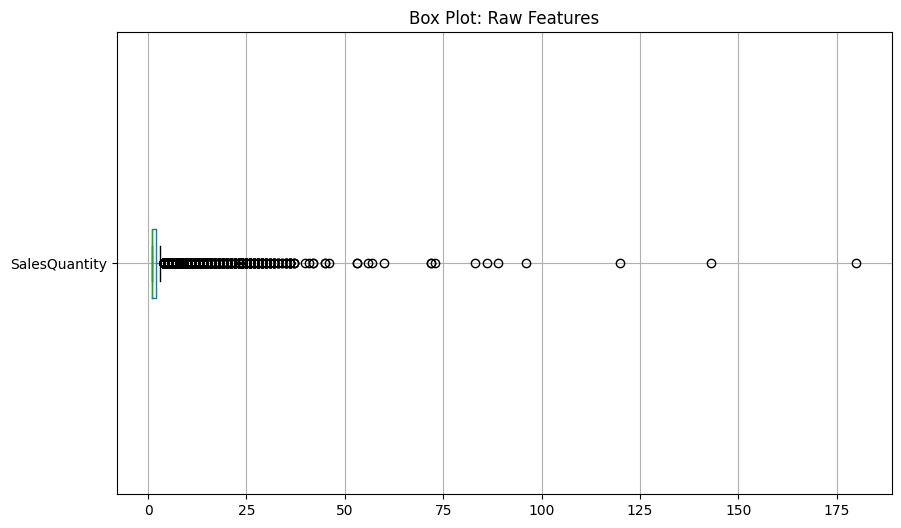

In [9]:
fig, ax = plt.subplots(figsize=(10, 6))
boxplot = sales[['SalesQuantity']].boxplot(vert=False, ax=ax)
ax.set_title('Box Plot: Raw Features')

Missing values in Quantity: 0


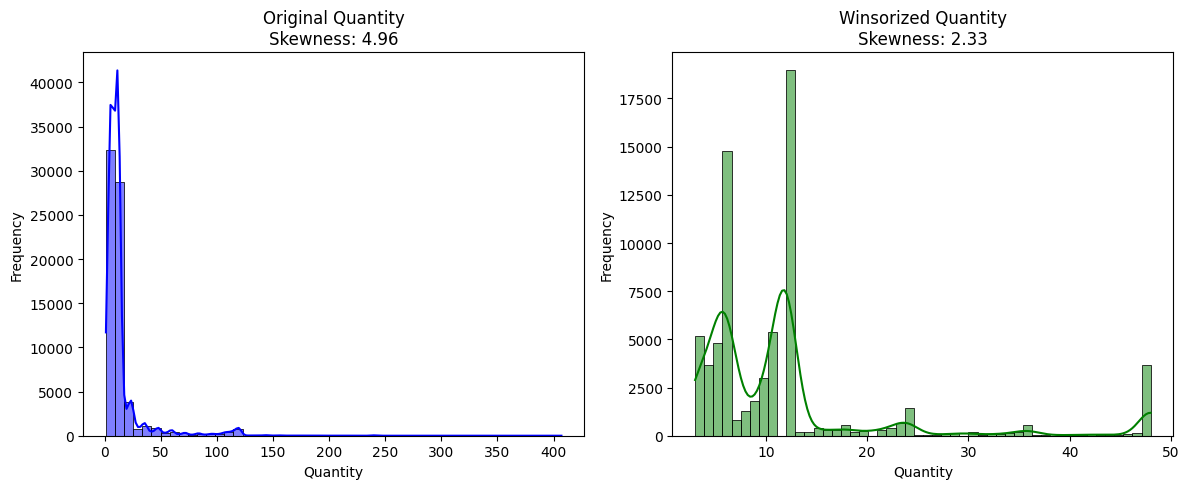


Original Quantity Statistics:
count   70830.00
mean       14.33
std        21.38
min         1.00
25%         6.00
50%        11.00
75%        12.00
max       407.00
Name: Quantity, dtype: float64

Winsorized Quantity Statistics:
count   70830.00
mean       12.06
std        10.63
min         3.00
25%         6.00
50%        11.00
75%        12.00
max        48.00
Name: Quantity, dtype: float64

Winsorized DataFrame saved to '../../Data/Final/lead_time_data.csv'


In [10]:
# Load the datasets
prep_file_path = '../../Data/Prepped/lead_time_data.csv'
final_file_path = '../../Data/Final/lead_time_data.csv'

#  Create a copy for winsorization to ensure original data remains untouched
winsorized_leadTime = leadTime.copy()

# Check for missing values
print("Missing values in Quantity:", leadTime['Quantity'].isnull().sum())

# Apply winsorization to both columns at the 5th and 95th percentiles
winsorized_leadTime['Quantity'] = winsorize(winsorized_leadTime['Quantity'], limits=(0.05, 0.05))


# Create a figure for Quantity visualization
plt.figure(figsize=(12, 5))

# Histogram of original quantity data
plt.subplot(1, 2, 1)
sns.histplot(data=leadTime, x="Quantity", bins=50, kde=True, color='blue')
plt.title(f"Original Quantity\nSkewness: {leadTime['Quantity'].skew():.2f}")
plt.xlabel("Quantity")
plt.ylabel("Frequency")

# Histogram of winsorized quantity data
plt.subplot(1, 2, 2)
sns.histplot(data=winsorized_leadTime, x="Quantity", bins=50, kde=True, color='green')
plt.title(f"Winsorized Quantity\nSkewness: {winsorized_leadTime['Quantity'].skew():.2f}")

plt.xlabel("Quantity")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# Compare summary statistics for Quantity
print("\nOriginal Quantity Statistics:")
print(leadTime['Quantity'].describe())
print("\nWinsorized Quantity Statistics:")
print(winsorized_leadTime['Quantity'].describe())

# Save the winsorized DataFrame to the Final folder with the same name as the original
winsorized_leadTime.to_csv(final_file_path, index=False)
print(f"\nWinsorized DataFrame saved to '{final_file_path}'")

# Data understanding

## Sales analysis

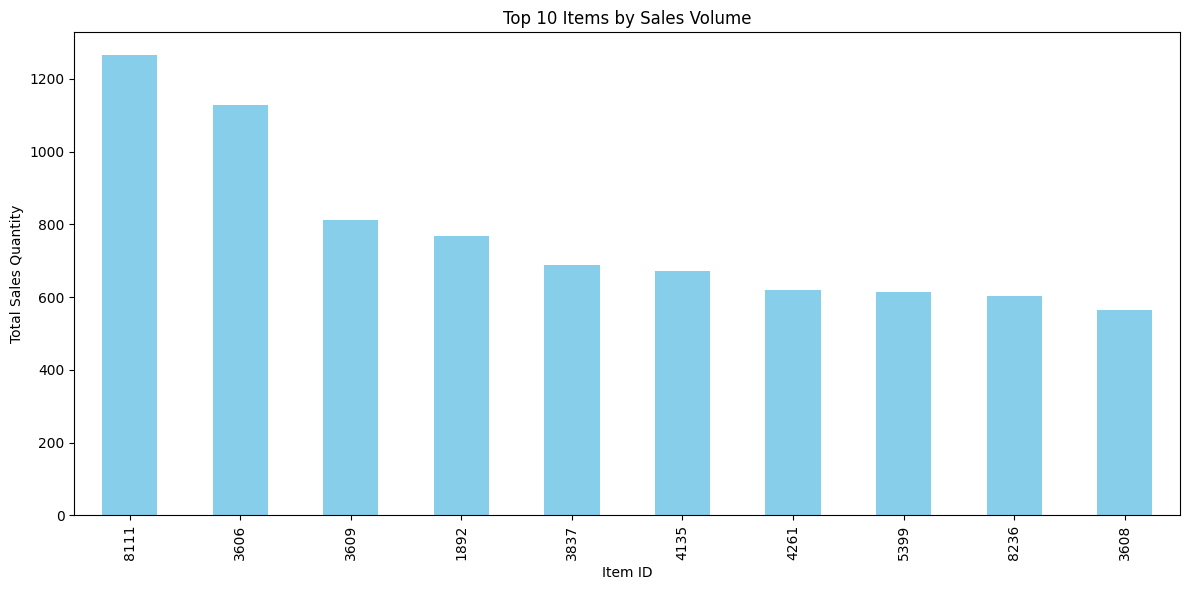

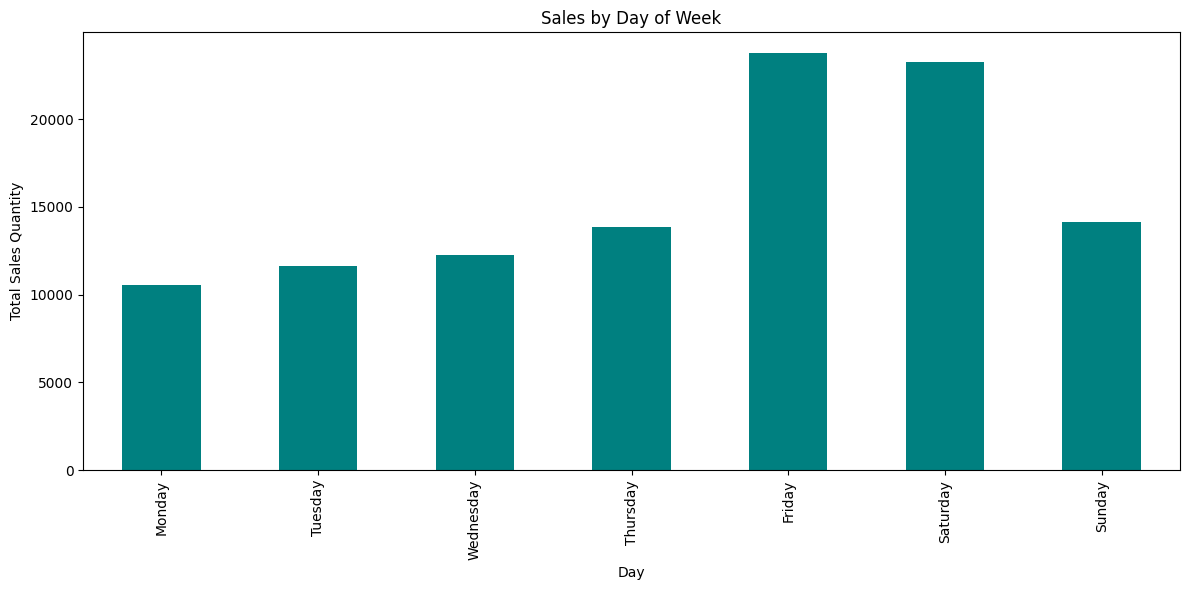

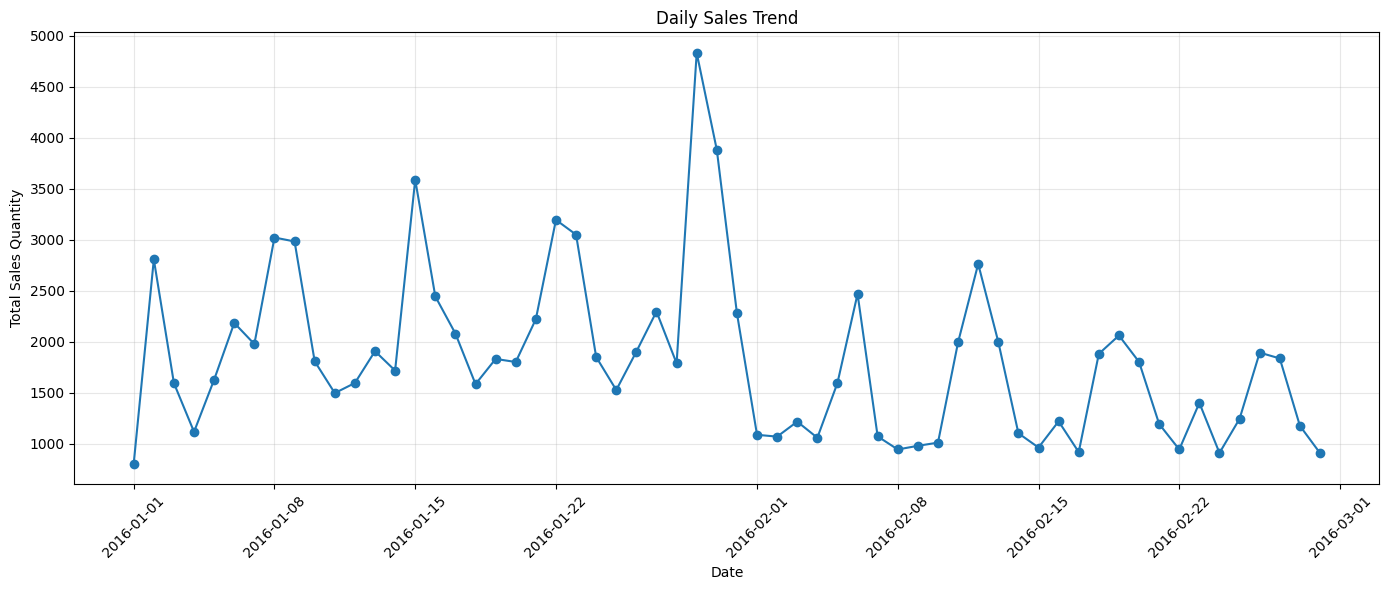

In [11]:
# 1. Top 10 Items by Sales Volume
top_items = sales.groupby('ItemID')['SalesQuantity'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
top_items.plot(kind='bar', color='skyblue')
plt.title('Top 10 Items by Sales Volume')
plt.xlabel('Item ID')
plt.ylabel('Total Sales Quantity')
plt.tight_layout()


# 2. Sales by Day of Week
sales['DayOfWeek'] = sales['SalesDate'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_sales = sales.groupby('DayOfWeek')['SalesQuantity'].sum()
day_sales = day_sales.reindex(day_order)

plt.figure(figsize=(12, 6))
day_sales.plot(kind='bar', color='teal')
plt.title('Sales by Day of Week')
plt.xlabel('Day')
plt.ylabel('Total Sales Quantity')
plt.tight_layout()


# 3. Sales Trend Over Time
daily_sales = sales.groupby('SalesDate')['SalesQuantity'].sum().reset_index()
plt.figure(figsize=(14, 6))
plt.plot(daily_sales['SalesDate'], daily_sales['SalesQuantity'], marker='o', linestyle='-')
plt.title('Daily Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Sales Quantity')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()



## Purchases analysis

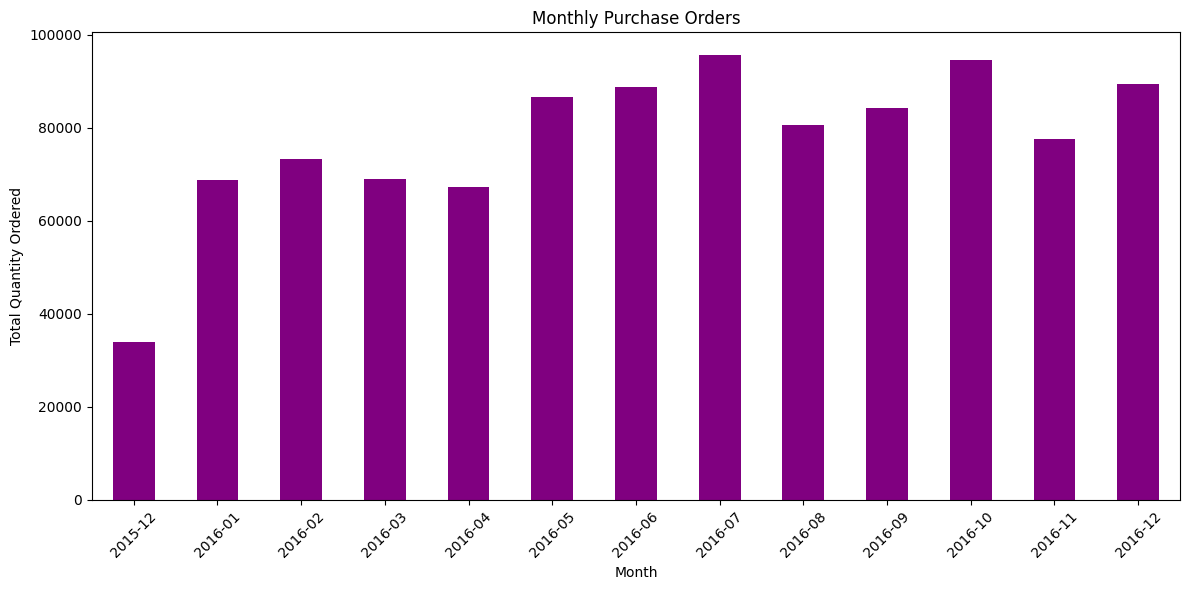

In [12]:
# 4. Purchase Order Patterns
monthly_purchases = purchases.groupby(purchases['PODate'].dt.to_period('M'))['Quantity'].sum()
plt.figure(figsize=(12, 6))
monthly_purchases.plot(kind='bar', color='purple')
plt.title('Monthly Purchase Orders')
plt.xlabel('Month')
plt.ylabel('Total Quantity Ordered')
plt.xticks(rotation=45)
plt.tight_layout()



## Lead time analysis



Lead Time Analysis

Lead Time Summary Statistics:
count   70426.00
mean        7.98
std         2.23
min         3.00
25%         6.00
50%         8.00
75%        10.00
max        14.00
Name: lead_time, dtype: float64


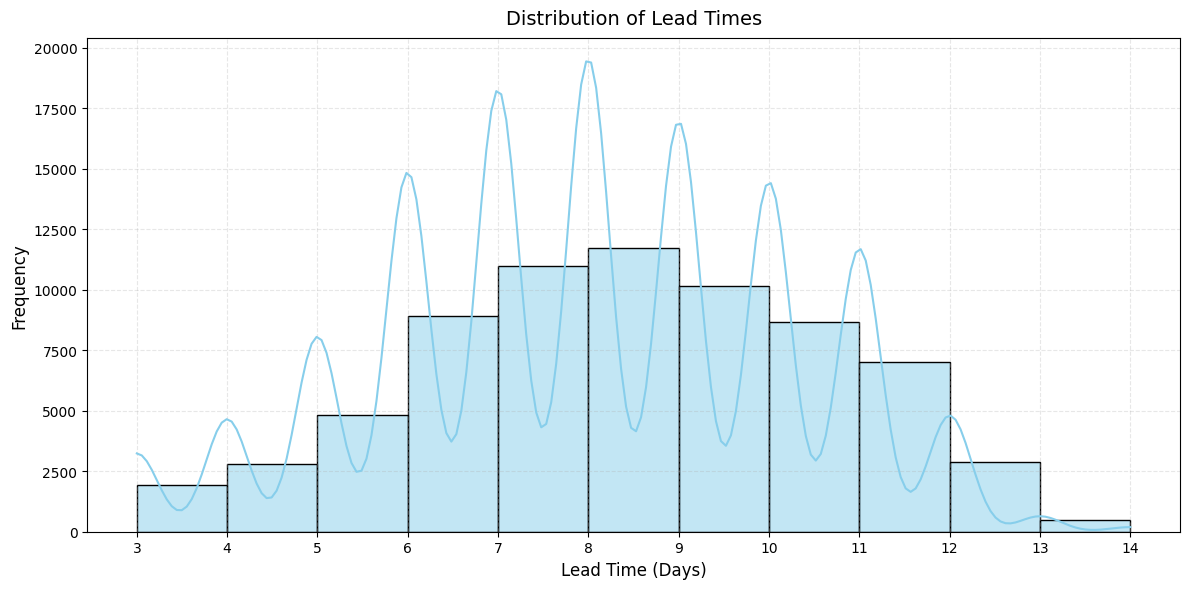

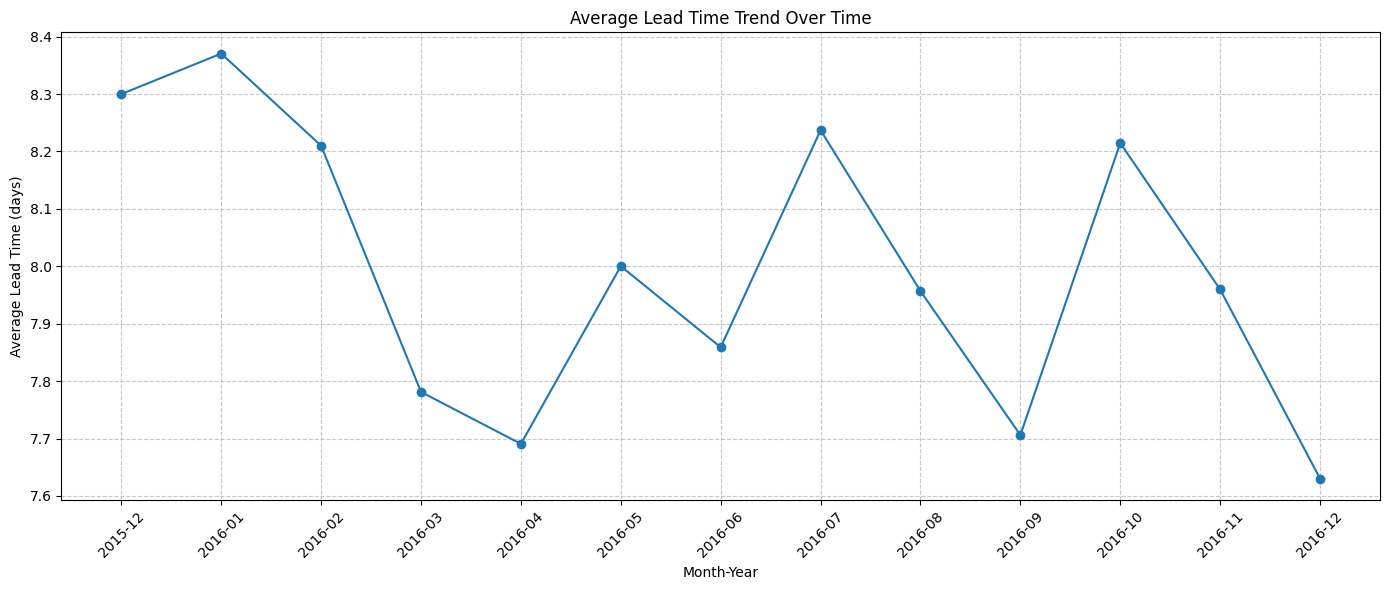

In [13]:

purchases['lead_time'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days

# Print the lead time
print("\n\n" + "="*50)
print("Lead Time Analysis")
print("="*50)

print("\nLead Time Summary Statistics:")
print(purchases['lead_time'].describe())

# 5. Lead Time Analysis (time between PO and Receiving)
purchases['LeadTime'] = (purchases['ReceivingDate'] - purchases['PODate']).dt.days
# Create the plot
plt.figure(figsize=(12, 6))

# Plot histogram with integer bins (one bin per day from 3 to 14) 
bins = range(3, 15)  ## (From the Lead time stats we could see that Lead time had a min of 3 and max of 14)
sns.histplot(data=purchases, x='LeadTime', bins=bins, kde=True, 
             stat='count', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Distribution of Lead Times', fontsize=14, pad=10)
plt.xlabel('Lead Time (Days)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True, alpha=0.3, linestyle='--')

# Ensure x-axis shows integer ticks
plt.xticks(range(3, 15))

# Adjust layout and save
plt.tight_layout()
plt.show()

# 6.Analyze changes in lead time over time
purchases['month_year'] = purchases['PODate'].dt.to_period('M')
lead_time_trend = purchases.groupby('month_year')['lead_time'].mean().reset_index()
lead_time_trend['month_year'] = lead_time_trend['month_year'].astype(str)

plt.figure(figsize=(14, 6))
plt.plot(lead_time_trend['month_year'], lead_time_trend['lead_time'], marker='o')
plt.title('Average Lead Time Trend Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Average Lead Time (days)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()